<a href="https://colab.research.google.com/github/alinka-mrkv/DriverHandDetection/blob/dev_bearsu/%5BMediaPipe_Python_Tasks%5D_Pose_Landmarker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pose Landmarks Detection with MediaPipe Tasks


## Collected photo data:
https://img001.prntscr.com/file/img001/C-gwxwzLRgSNZojpIc-DUg.png
https://img001.prntscr.com/file/img001/6IzobK7MQe6QNbYbkiaARA.png
https://img001.prntscr.com/file/img001/UWewo87iTLerq9Y1R9oYAA.png
https://img001.prntscr.com/file/img001/YODEqin4Sd63z33yOvTlww.png

## Origins
### About pose_landmarker
https://github.com/google/mediapipe/tree/master/mediapipe/tasks/python/vision
https://github.com/google/mediapipe/tree/master/mediapipe/python/solutions

## Preparation

Let's start with installing MediaPipe.


In [1]:
!pip install -q mediapipe==0.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 36.1 MB/s eta 0:00:00


Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker#models) for more information about this model bundle.

In [2]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

## Visualization utilities

In [3]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

## Download test image


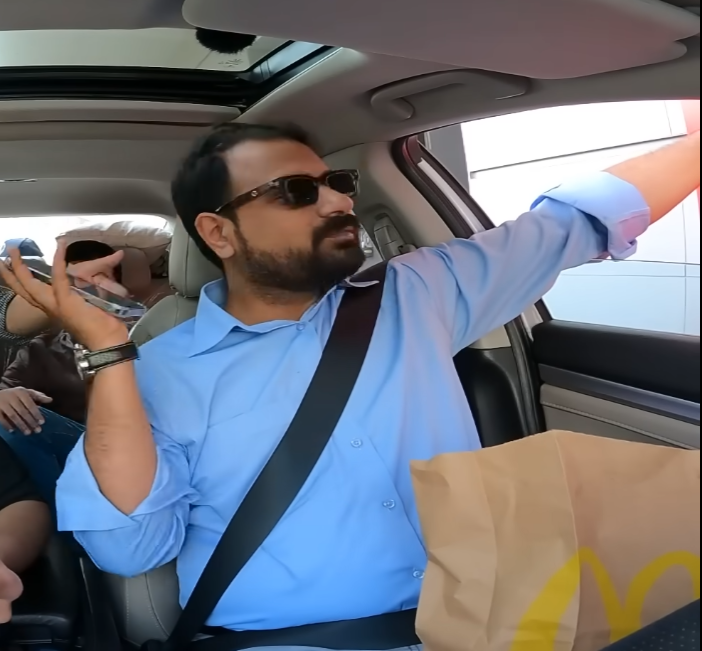

In [4]:
!wget -q -O image.png https://img001.prntscr.com/file/img001/6IzobK7MQe6QNbYbkiaARA.png

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("image.png")
cv2_imshow(img)

## Running inference and visualizing the results

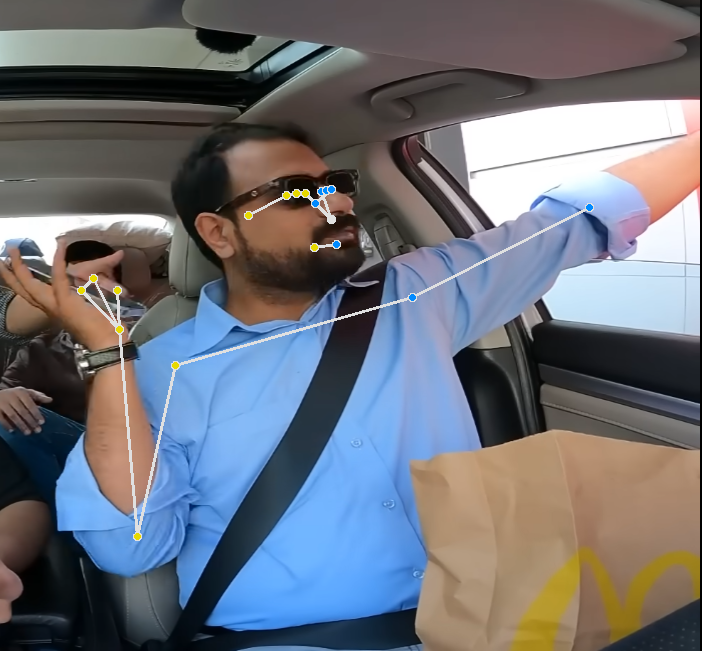

World Landmark #0: Landmark(x=-0.013210035860538483, y=-0.5759862661361694, z=-0.21135157346725464, visibility=0.9980500936508179, presence=0.9994745850563049)
World Landmark #1: Landmark(x=-0.0014255642890930176, y=-0.5965716242790222, z=-0.19843789935112, visibility=0.9878435134887695, presence=0.9991587400436401)
World Landmark #2: Landmark(x=-0.0023031607270240784, y=-0.5979347229003906, z=-0.1892993152141571, visibility=0.9902296662330627, presence=0.9992181062698364)
World Landmark #3: Landmark(x=-0.004149198532104492, y=-0.5969151258468628, z=-0.19108909368515015, visibility=0.9867095351219177, presence=0.9988705515861511)
World Landmark #4: Landmark(x=-0.028336070477962494, y=-0.6006431579589844, z=-0.21790768206119537, visibility=0.9950639605522156, presence=0.9989988207817078)
World Landmark #5: Landmark(x=-0.0255759134888649, y=-0.6008077263832092, z=-0.23084621131420135, visibility=0.9974775910377502, presence=0.9991845488548279)
World Landmark #6: Landmark(x=-0.02117028832

In [5]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    #min_pose_detection_confidence=0.00001, # пример установки min_pose_detection_confidence
    #min_pose_presence_confidence=0.00001, # пример установки min_pose_presence_confidence
    #min_tracking_confidence=0.00001, # пример установки min_tracking_confidence
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.png")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
#for landmark_group in detection_result.pose_landmarks:
#    for j, landmark in enumerate(landmark_group):
#        print(f"Landmark #{j}: {landmark}")
for landmark_group in detection_result.pose_world_landmarks:
    for j, landmark in enumerate(landmark_group):
        print(f"World Landmark #{j}: {landmark}")


# World Landmark Visualization
### Draws world landmarks and connections between them, then detects intersection point of elbow-wrist vector to pseudo window created by plane with 4 vertices
When we create a four-point plane, we have some freedom because we can choose any three of those four points to define the plane. In this example, suppose we take the first three points in the vertices array to define the plane.

The normal to the plane can be found as the vector product of two vectors in the plane. In this case, we can take the vectors AB = B - A and AC = C - A, where A, B, and C are the first three points in the vertices array.

Given a normal to the plane, we can find D as -A dot N, where N is the normal and A is one of the points in the plane.

Finally, to find the intersection of the vector and the plane, we can solve a system of equations. In this case, this equation will be N dot (R - A) = 0, where R = elbow_point + t * vector.


Vector from elbow to wrist: [ 0.17446196 -0.07338566 -0.02983852]
Intersection point: [ 0.35818075 -0.63609723 -0.07362646]


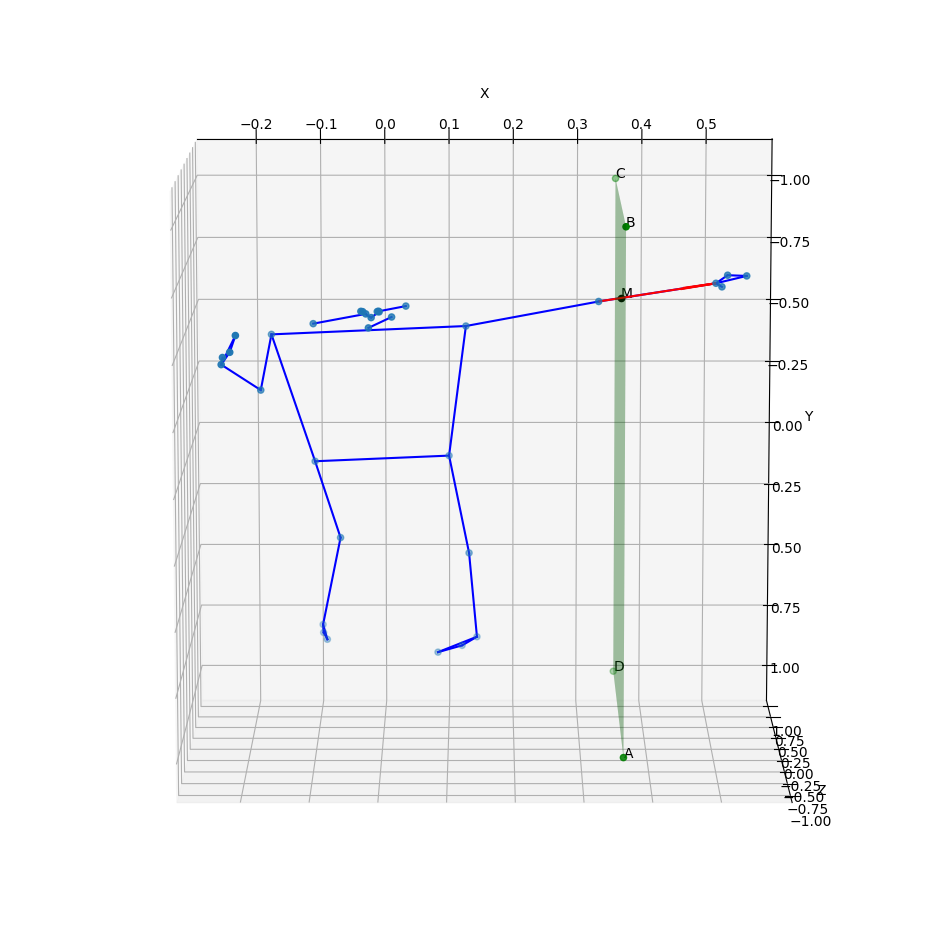

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract 3D landmarks
world_landmarks = []
for landmark_group in detection_result.pose_world_landmarks:
    for j, landmark in enumerate(landmark_group):
        world_landmarks.append([landmark.x, landmark.y, landmark.z])

# Convert to numpy array
world_landmarks = np.array(world_landmarks)

# Plot 3D landmarks
fig = plt.figure(figsize=[12, 12])
ax = fig.add_subplot(111, projection='3d')

# Draw the points
ax.scatter(world_landmarks[:, 0], world_landmarks[:, 1], world_landmarks[:, 2])

# Define connections
POSE_CONNECTIONS = frozenset([(0, 1), (1, 2), (2, 3), (3, 7), (0, 4), (4, 5),
                              (5, 6), (6, 8), (9, 10), (11, 12), (11, 13),
                              (13, 15), (15, 17), (15, 19), (15, 21), (17, 19),
                              (12, 14), (14, 16), (16, 18), (16, 20), (16, 22),
                              (18, 20), (11, 23), (12, 24), (23, 24), (23, 25),
                              (24, 26), (25, 27), (26, 28), (27, 29), (28, 30),
                              (29, 31), (30, 32), (27, 31), (28, 32)])

# Draw the connections
for connection in POSE_CONNECTIONS:
    ax.plot([world_landmarks[connection[0], 0], world_landmarks[connection[1], 0]],
            [world_landmarks[connection[0], 1], world_landmarks[connection[1], 1]],
            [world_landmarks[connection[0], 2], world_landmarks[connection[1], 2]],
            'blue')

elbow_point = world_landmarks[13]
wrist_point = world_landmarks[15]

# Vector from elbow to wrist
vector = wrist_point - elbow_point
# Draw vector
ax.quiver(elbow_point[0], elbow_point[1], elbow_point[2],
          vector[0], vector[1], vector[2],
          color='r', length=np.linalg.norm(vector), normalize=True)

print(f"Vector from elbow to wrist: {vector}")

# Calculate approximate distance of window
appr_window_distance_x = elbow_point[0] + elbow_point[0] * 0.1

# Create vertices for plane
vertices = np.array([[appr_window_distance_x, 1, -1],
                     [appr_window_distance_x, -1, -1],
                     [appr_window_distance_x, -1, 1],
                     [appr_window_distance_x, 1, 1]])
# To store coordinates
X = vertices[:, 0]
Y = vertices[:, 1]
Z = vertices[:, 2]
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='g')
# Add labels to vertices
ax.text(*vertices[0], 'A', color='black')
ax.text(*vertices[1], 'B', color='black')
ax.text(*vertices[2], 'C', color='black')
ax.text(*vertices[3], 'D', color='black')


# Create grid for X, Y and Z
X, Y = np.meshgrid(X, Y)
Z = np.full(X.shape, Z)

# Draw created surface
ax.plot_surface(X, Y, Z, color='g', alpha=0.2)

# Calculate plane normal
AB = vertices[1] - vertices[0]
AC = vertices[2] - vertices[0]
N = np.cross(AB, AC)

# Calculate D
D = -np.dot(vertices[0], N)

# Calculate intersection
t = -(np.dot(N, elbow_point) + D) / np.dot(N, vector)
intersection = elbow_point + t * vector

print(f"Intersection point: {intersection}")

# Add intersection point to the plot
ax.scatter(*intersection, color='black')
ax.text(*intersection, 'M', color='black')

ax.view_init(elev=-80, azim=-90)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()



Visualize the pose segmentation mask.

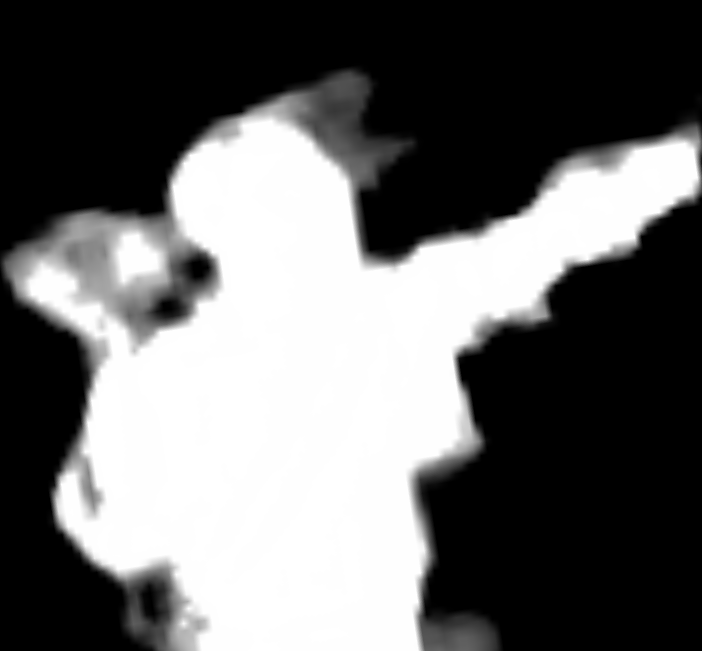

In [7]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
cv2_imshow(visualized_mask)
